# Questrade Custom API Wrapper Examples

This notebook demonstrates how to use the Questrade Custom API Wrapper for various common tasks.

In [1]:
import sys
from pathlib import Path
import datetime
from datetime import timedelta
import pandas as pd
import matplotlib.pyplot as plt

# Add project root to path
project_root = Path('..').resolve()
sys.path.append(str(project_root))
print(f"Project root: {project_root}")

Project root: C:\Users\Administrator\Documents\QuestradeCustomAPIWrapper_20250321_153010


## 1. Authentication and Setup

First, let's initialize the API wrapper. You can provide a refresh token directly, or let the wrapper use a saved token file.

In [2]:
from QuestradeAPI.CustomWrapper import QuestradeAPI

# Method 1: Use saved token (will prompt for token if none exists)
api = QuestradeAPI()

# Method 2: Provide refresh token directly
# api = QuestradeAPI(refresh_token="your_refresh_token_here")

# Method 3: Specify custom token file path
# api = QuestradeAPI(token_path="/path/to/token.json")

print("API initialized successfully!")

API initialized successfully!


## 2. Account Information

Let's retrieve basic account information.

In [3]:
# Get all accounts
accounts = api.get_accounts()
print(f"Found {len(accounts['accounts'])} accounts")

# Select the first account for further examples
if accounts['accounts']:
    account = accounts['accounts'][0]
    account_id = account['number']
    print(f"Using account: {account_id} ({account['type']})")    
else:
    print("No accounts found!")

Found 4 accounts
Using account: 27955569 (Margin)


In [4]:
# Get account balances
balances = api.get_account_balances(account_id)

# Display combined balances
combined = balances['combinedBalances']
for balance in combined:
    print(f"Currency: {balance['currency']}")
    print(f"  Cash: ${balance['cash']:.2f}")
    print(f"  Market Value: ${balance['marketValue']:.2f}")
    print(f"  Total Equity: ${balance['totalEquity']:.2f}")

Currency: CAD
  Cash: $68.39
  Market Value: $0.00
  Total Equity: $68.39
Currency: USD
  Cash: $47.74
  Market Value: $0.00
  Total Equity: $47.74


In [5]:
# Get account positions
positions = api.get_account_positions(account_id)

# Create a DataFrame for better visualization
if positions['positions']:
    positions_df = pd.DataFrame(positions['positions'])
    
    # Select and format key columns
    display_cols = ['symbol', 'openQuantity', 'currentPrice', 'currentMarketValue', 'averageEntryPrice']
    positions_df = positions_df[display_cols].copy()
    
    # Calculate profit/loss
    positions_df['profit_loss'] = positions_df['currentPrice'] - positions_df['averageEntryPrice']
    positions_df['profit_loss_pct'] = (positions_df['profit_loss'] / positions_df['averageEntryPrice']) * 100
    
    # Format for display
    positions_df['profit_loss'] = positions_df['profit_loss'].map('${:.2f}'.format)
    positions_df['profit_loss_pct'] = positions_df['profit_loss_pct'].map('{:.2f}%'.format)
    
    display(positions_df)
else:
    print("No positions found in this account.")

No positions found in this account.


## 3. Account Activities and Executions

In [6]:
# Get account activities for the last 30 days
end_time = datetime.datetime.now().strftime("%Y-%m-%dT%H:%M:%S.000000-05:00")
start_time = (datetime.datetime.now() - timedelta(days=30)).strftime("%Y-%m-%dT%H:%M:%S.000000-05:00")

activities = api.get_account_activities(account_id, start_time, end_time)

if activities['activities']:
    activities_df = pd.DataFrame(activities['activities'])
    print(f"Found {len(activities_df)} activities in the last 30 days")
    
    # Display the most recent activities
    display(activities_df.head())
else:
    print("No activities found in the specified date range.")

Found 1 activities in the last 30 days


,tradeDate,transactionDate,settlementDate,action,symbol,symbolId,description,currency,quantity,price,grossAmount,commission,netAmount,type
0,2025-03-17T00:00:00.000000-04:00,2025-03-17T00:00:00.000000-04:00,2025-03-17T00:00:00.000000-04:00,,,0,INT FR 02/16 THRU03/15@12 % BAL 743 ...,USD,0,0,0,0,-6.84,Interest


In [7]:
# Get recent executions
executions = api.get_account_executions(account_id)

if executions['executions']:
    executions_df = pd.DataFrame(executions['executions'])
    print(f"Found {len(executions_df)} recent executions")
    display(executions_df)
else:
    print("No recent executions found.")

No recent executions found.


## 4. Market Data

Now let's explore market data functionality.

In [8]:
# Search for symbols
search_term = "AAPL"
search_results = api.search_symbols(search_term)

if search_results['symbols']:
    symbols_df = pd.DataFrame(search_results['symbols'])
    display(symbols_df)
    
    # Save the first symbol ID for later use
    symbol_id = search_results['symbols'][0]['symbolId']
    symbol_name = search_results['symbols'][0]['symbol']
    print(f"Using symbol: {symbol_name} (ID: {symbol_id})")
else:
    print(f"No symbols found for '{search_term}'")

,symbol,symbolId,description,securityType,listingExchange,isTradable,isQuotable,currency
0,AAPL,8049,APPLE INC,Stock,NASDAQ,True,True,USD
1,AAPL.TO,39472334,APPLE INC,Stock,TSX,True,True,CAD
2,AVSPY.IN,28301,AAPL Alpha Index,Index,NASDAQI,False,True,USD
3,AAPW,59883807,ROUNDHILL AAPL WEEKLYPAY ETF,Stock,BATS,True,True,USD
4,AAPL.TO,37727146,APPLE INC CDR (CAD HEDGED) DEPOSITARY RECEIPTS...,Stock,NEO,False,False,CAD
5,NY2LAAPL.IN,19786673,ICE Leveraged 2x AAPL Index,Index,NYSEGIF,False,True,USD
6,APLY,47195488,TIDAL TRUST II YIELDMAX AAPL OPTION INCOME STR...,Stock,ARCA,True,True,USD
7,AAPB,43621933,GRANITESHARES ETF TRUST 2X LONG AAPL DAILY ETF,Stock,NASDAQ,True,True,USD
8,AAPD,43621934,DIREXION SHARES ETF TRUST DAILY AAPL BEAR 1X SHS,Stock,NASDAQ,True,True,USD
9,AAPU,43621935,DIREXION SHARES ETF TRUST DAILY AAPL BULL 2X S...,Stock,NASDAQ,True,True,USD


Using symbol: AAPL (ID: 8049)


In [9]:
# Get symbol quotes
quotes = api.get_quotes([symbol_id])

if quotes['quotes']:
    quote = quotes['quotes'][0]
    print(f"Quote for {quote['symbol']}:")
    print(f"  Bid: ${quote['bidPrice']:.2f} ({quote['bidSize']} shares)")
    print(f"  Ask: ${quote['askPrice']:.2f} ({quote['askSize']} shares)")
    print(f"  Last: ${quote['lastTradePrice']:.2f}")
    print(f"  Volume: {quote['volume']}")
else:
    print("No quotes found.")

Quote for AAPL:
  Bid: $217.52 (1 shares)
  Ask: $217.59 (1 shares)
  Last: $217.51
  Volume: 93514475


C:\Users\Administrator\AppData\Local\Temp\ipykernel_12472\2468339644.py:21: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise a warning unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  candles_df['start'] = pd.to_datetime(candles_df['start'])


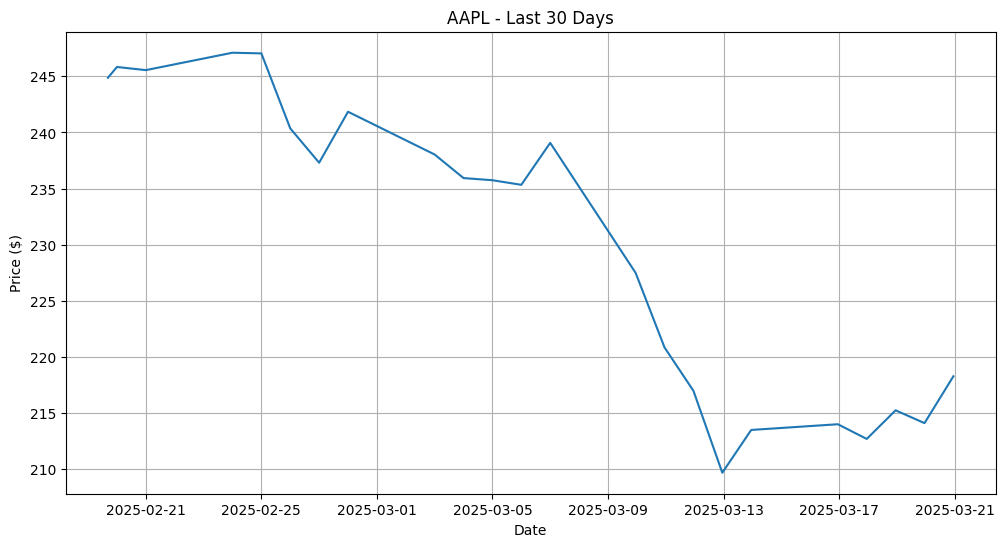

,end,low,high,open,close,volume,VWAP
start,,,,,,,
2025-02-19 16:30:20-05:00,2025-02-20T00:00:00.000000-05:00,243.1604,246.01,244.660,244.87,32204215,244.698606
2025-02-20 00:00:00-05:00,2025-02-21T00:00:00.000000-05:00,244.2900,246.78,244.940,245.83,32316907,245.643959
2025-02-21 00:00:00-05:00,2025-02-22T00:00:00.000000-05:00,245.2200,248.69,245.950,245.55,53197431,246.387753
2025-02-24 00:00:00-05:00,2025-02-25T00:00:00.000000-05:00,244.4200,248.86,244.925,247.10,51326396,247.304074
2025-02-25 00:00:00-05:00,2025-02-26T00:00:00.000000-05:00,244.9100,250.00,248.000,247.04,48013272,247.547272


In [10]:
# Get historical data (candles)
end_time = datetime.datetime.now()
start_time = end_time - timedelta(days=30)

# Format dates in ISO 8601 format with timezone
start_time_str = start_time.strftime("%Y-%m-%dT%H:%M:%S.000-05:00")
end_time_str = end_time.strftime("%Y-%m-%dT%H:%M:%S.000-05:00")

candles = api.get_candles(
    symbol_id=symbol_id,
    start_time=start_time_str,
    end_time=end_time_str,
    interval="OneDay"
)

if candles['candles']:
    # Convert to DataFrame
    candles_df = pd.DataFrame(candles['candles'])
    
    # Convert start to datetime
    candles_df['start'] = pd.to_datetime(candles_df['start'])
    
    # Set start as index
    candles_df.set_index('start', inplace=True)
    
    # Plot the data
    plt.figure(figsize=(12, 6))
    plt.plot(candles_df.index, candles_df['close'])
    plt.title(f"{symbol_name} - Last 30 Days")
    plt.xlabel('Date')
    plt.ylabel('Price ($)')
    plt.grid(True)
    plt.show()
    
    # Display the data
    display(candles_df.head())
else:
    print("No candles data found.")

## 5. Options Data

Let's explore options data for a symbol.

In [11]:
# Get option chain
options = api.get_symbol_options(symbol_id)

if options and 'options' in options:
    # Get available expiry dates
    expiry_dates = [option['expiryDate'] for option in options['options']]
    print(f"Available expiry dates for {symbol_name}:")
    for date in expiry_dates:
        print(f"  {date}")
    
    # Select the first expiry date for demonstration
    if expiry_dates:
        selected_date = expiry_dates[0]
        print(f"\nSelected expiry date: {selected_date}")
        
        # Get options for this expiry date
        selected_option = next((opt for opt in options['options'] if opt['expiryDate'] == selected_date), None)
        
        if selected_option and 'chainPerRoot' in selected_option:
            chains = selected_option['chainPerRoot']
            if chains:
                # Extract calls and puts
                calls = []
                puts = []
                
                for root in chains:
                    for strike in root['chainPerStrikePrice']:
                        strike_price = strike['strikePrice']
                        
                        if 'callSymbolId' in strike:
                            calls.append({
                                'strikePrice': strike_price,
                                'symbolId': strike['callSymbolId'],
                                'type': 'CALL'
                            })
                            
                        if 'putSymbolId' in strike:
                            puts.append({
                                'strikePrice': strike_price,
                                'symbolId': strike['putSymbolId'],
                                'type': 'PUT'
                            })
                
                # Create DataFrames
                calls_df = pd.DataFrame(calls)
                puts_df = pd.DataFrame(puts)
                
                print(f"\nFound {len(calls_df)} calls and {len(puts_df)} puts")
                
                # Display a few calls and puts
                print("\nSample Calls:")
                display(calls_df.head())
                
                print("\nSample Puts:")
                display(puts_df.head())
                
                # Get quotes for a few options
                if len(calls_df) > 0:
                    call_id = calls_df.iloc[len(calls_df)//2]['symbolId']  # Middle strike call
                    call_quotes = api.get_quotes([call_id])
                    
                    if call_quotes['quotes']:
                        print("\nSample Call Option Quote:")
                        quote = call_quotes['quotes'][0]
                        print(f"Symbol: {quote['symbol']}")
                        print(f"Bid: ${quote['bidPrice']:.2f}, Ask: ${quote['askPrice']:.2f}")
                        print(f"Last: ${quote['lastTradePrice']:.2f}, Volume: {quote['volume']}")
            else:
                print("No option chain data found for the selected date.")
        else:
            print("No option chain data found for the selected date.")
else:
    print("No option chain data found.")

No option chain data found.


## 6. Order Management

Let's explore order management functionality. Note: This section includes examples of creating orders but they are commented out to prevent accidental order placement.

In [12]:
# Get open orders
orders = api.get_account_orders(account_id, state="Open")

if orders['orders']:
    orders_df = pd.DataFrame(orders['orders'])
    print(f"Found {len(orders_df)} open orders")
    display(orders_df)
else:
    print("No open orders found.")

No open orders found.


## 7. Error Handling Examples

Let's demonstrate how to handle errors with the wrapper.

In [13]:
from QuestradeAPI.CustomWrapper import (
    QuestradeAPIError, 
    QuestradeGeneralError, 
    QuestradeOrderError,
    QuestradeRateLimitError
)

# Example of handling a non-existent account
try:
    invalid_account = "12345678"  # This account ID doesn't exist
    positions = api.get_account_positions(invalid_account)
except QuestradeGeneralError as e:
    print(f"General error: {e.code} - {e.message}")
    print(f"HTTP status: {e.status_code}")
except QuestradeAPIError as e:
    print(f"API error: {e.code} - {e.message}")

General error: 1018 - Account number not found
HTTP status: 404


In [14]:
# Example of handling rate limits
try:
    # Create a new API instance with no retries to demonstrate rate limiting
    no_retry_api = QuestradeAPI(max_retries=0)
    
    # Make many requests in a loop to trigger rate limiting
    print("Making multiple requests to trigger rate limiting...")
    for i in range(50):  # This might trigger rate limiting
        result = no_retry_api.get_accounts()
        print(f"Request {i+1} successful", end="\r")
    
    print("\nCompleted all requests without hitting rate limits.")
except QuestradeRateLimitError as e:
    print(f"\nRate limit error: {e.code} - {e.message}")
    print(f"Retry after: {e.retry_after} seconds")
except Exception as e:
    print(f"\nUnexpected error: {str(e)}")

Making multiple requests to trigger rate limiting...
Request 50 successful
Completed all requests without hitting rate limits.


## 8. Advanced Usage: Rate Limiting Configuration

In [15]:
# Create API with custom rate limiting settings
custom_api = QuestradeAPI(
    enforce_rate_limit=True,  # Enable rate limiting
    max_retries=5             # Set maximum retry attempts
)

print("API initialized with custom rate limiting settings")
print(f"Rate limiting enabled: {custom_api.enforce_rate_limit}")
print(f"Maximum retries: {custom_api.max_retries}")

API initialized with custom rate limiting settings
Rate limiting enabled: True
Maximum retries: 5


## 9. Summary

This notebook demonstrated the key features of the Questrade Custom API Wrapper:

1. Authentication and setup
2. Account information retrieval
3. Market data access
4. Options data
5. Order management
6. Error handling
7. Rate limiting configuration

For more information, refer to the documentation or explore the API methods directly.